# This notebook uses transfer learning using a trained model from tensorflow hub to predict correct images of cat and dogs

Extracting dataset using Kaggle API

In [1]:
# installing the kaggle library
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# configuring kaggle library
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset

In [9]:
# Kaggle API
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:06<00:00, 106MB/s]
100% 812M/812M [00:06<00:00, 127MB/s]


In [10]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [16]:
# extracting the compressed datset
from  zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()


In [19]:
# extracting the compressed datset
from  zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

In [20]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images:' , file_count)


Number of images: 25000


In [23]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.10681.jpg', 'dog.574.jpg', 'cat.7157.jpg', 'cat.6207.jpg', 'cat.5260.jpg', 'dog.7.jpg', 'dog.8278.jpg', 'dog.12292.jpg', 'cat.12199.jpg', 'cat.4128.jpg', 'dog.11182.jpg', 'dog.534.jpg', 'cat.10537.jpg', 'dog.4971.jpg', 'cat.2651.jpg', 'dog.2157.jpg', 'cat.7319.jpg', 'dog.5944.jpg', 'cat.2220.jpg', 'cat.4641.jpg', 'dog.1243.jpg', 'cat.1584.jpg', 'dog.5241.jpg', 'dog.10713.jpg', 'dog.10627.jpg', 'cat.5603.jpg', 'dog.8153.jpg', 'dog.12049.jpg', 'dog.5842.jpg', 'dog.7484.jpg', 'cat.9265.jpg', 'cat.11549.jpg', 'cat.5613.jpg', 'cat.8537.jpg', 'dog.6426.jpg', 'cat.4728.jpg', 'cat.7474.jpg', 'cat.1799.jpg', 'dog.6874.jpg', 'dog.675.jpg', 'dog.5696.jpg', 'cat.8269.jpg', 'dog.174.jpg', 'cat.8222.jpg', 'cat.1836.jpg', 'dog.1563.jpg', 'dog.6393.jpg', 'cat.8455.jpg', 'cat.923.jpg', 'cat.819.jpg', 'cat.11937.jpg', 'dog.3763.jpg', 'cat.11336.jpg', 'dog.3116.jpg', 'dog.5093.jpg', 'dog.4715.jpg', 'cat.7092.jpg', 'dog.1995.jpg', 'cat.96.jpg', 'cat.8778.jpg', 'dog.5689.jpg', 'dog.1263.jpg', 'dog.50

importing Dependencies

In [22]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

displaying images of cat and dogs

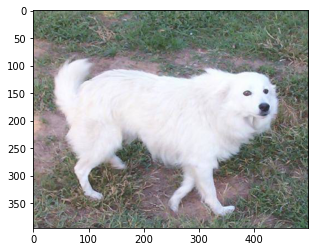

In [24]:
#dog image

img = mpimg.imread('/content/train/dog.8278.jpg')
imgplot = plt.imshow(img)
plt.show()

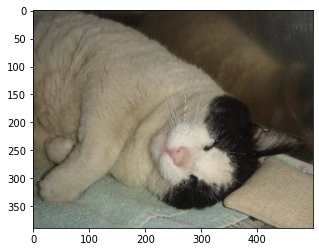

In [25]:
# cat image
img = mpimg.imread('/content/train/cat.7157.jpg')
imgplot = plt.imshow(img)
plt.show()

In [26]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print('Number of dogs images =', dog_count)
print('Number of cat images =', cat_count)




Number of dogs images = 12500
Number of cat images = 12500


Resizing images

In [27]:
# creating a directory for resized images
os.mkdir('/content/image resized')

In [69]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)



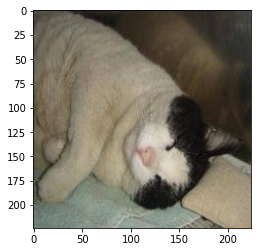

In [70]:
# resized cat image
img = mpimg.imread('/content/image resized/cat.7157.jpg')
imgplot = plt.imshow(img)
plt.show()

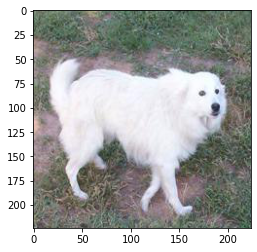

In [71]:
#resized dog image

img = mpimg.imread('/content/image resized/dog.8278.jpg')
imgplot = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cat
> Cat-->0

>Dog--1

In [72]:
# creating for loop to assign labels
filenames = os.listdir('/content/image resized/')

labels = []

for i in range (2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)


In [73]:
print(filenames[0:5])

['cat.10681.jpg', 'dog.574.jpg', 'cat.7157.jpg', 'cat.6207.jpg', 'cat.5260.jpg']


In [35]:
print(labels[0:5])

[0, 1, 0, 0, 0]


In [38]:
#values counts of images
counts,values = np.unique(labels, return_counts=True)
print(counts)
print(values)

[0 1]
[ 991 1009]


converting all images to numpy arrays

In [74]:
import cv2
import glob

In [75]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*' + e)) for e in image_extension]

images_cat_dog = np.asarray([cv2.imread(file) for file in files]) 

In [76]:
X = images_cat_dog
y = np.asarray(labels)


Seperating data into test data and training data

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [78]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [79]:
# scaling the data
X_train_scaled = X_train/224

X_test_scaled = X_test/224

Building a Nueral Network

In [52]:
import tensorflow as tf
import tensorflow_hub as hub


In [88]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3),trainable=False,dtype=tf.float32)


In [89]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
    
])


model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_9 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_13 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [91]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [92]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 29s 508ms/step - loss: 0.1943 - acc: 0.9294
Epoch 2/5
50/50 [==============================] - 26s 515ms/step - loss: 0.0739 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 25s 496ms/step - loss: 0.0565 - acc: 0.9900
Epoch 4/5
50/50 [==============================] - 25s 502ms/step - loss: 0.0434 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 25s 502ms/step - loss: 0.0369 - acc: 0.9919


In [93]:
score, acc = model.evaluate(X_test_scaled, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 7s 511ms/step - loss: 0.0674 - acc: 0.9675
Test Loss = 0.06737793236970901
Test Accuracy = 0.9674999713897705


## Predictive system

Path of the image to be predicted:/cat.jpeg


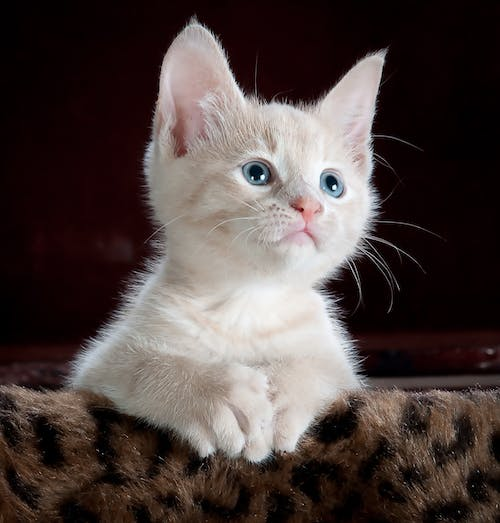

The image represents a cat


In [95]:
input_image_path = input('Path of the image to be predicted:' )

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/224

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a cat')
else:
  print('The image represent a Dog')
